<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Custom-data-augmentation" data-toc-modified-id="Custom-data-augmentation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Custom data augmentation</a></span></li><li><span><a href="#Saturate-the-image" data-toc-modified-id="Saturate-the-image-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Saturate the image</a></span></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,array_to_img,load_img
%matplotlib inline

# downloading the data

In [2]:
(train_ds, val_ds, test_ds), metadata =tfds.load('tf_flowers',
                                                    split=['train[:80%]','train[80%:90%]','train[90:]'],
                                                as_supervised=True,with_info=True)

In [3]:
metadata.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=5),
})

# number of classes

In [4]:
num_classes=metadata.features['label'].num_classes
print(num_classes)

5


In [5]:
print(metadata.download_size)

228813984


In [6]:
for im,lb in train_ds:
    print(im.shape)
    break

(333, 500, 3)


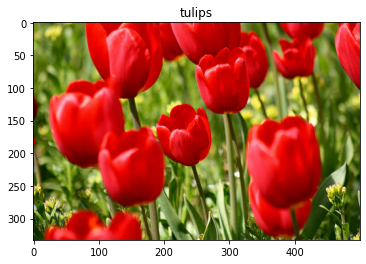

In [7]:
get_label_name=metadata.features['label'].int2str
for image,label in train_ds:
    plt.imshow(image)
    plt.title(get_label_name(label))
    break

In [8]:
data_generator=ImageDataGenerator(
                                  rotation_range=60, 
                                  width_shift_range=0.02,
                                  height_shift_range=0.04,
                                 rescale=1.0/255,
                                  shear_range=0.2,
                                  zoom_range=0.1,
                                 horizontal_flip=True,
                                 vertical_flip=True,
                                 fill_mode='nearest'
)

In [9]:
image=img_to_array(image)
image=image.reshape((1,)+image.shape)

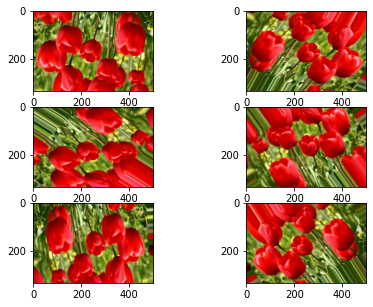

In [10]:
plt.figure(figsize=(7,5))
for i in range(6):
    img =next(iter(data_generator.flow(image,batch_size=1,save_to_dir='data_gen',save_prefix='flowers',save_format='jpg')))
    axis=plt.subplot(3,2,i+1)
    pl=plt.imshow(array_to_img(img[0]))
    

## Custom data augmentation

In [11]:
def random_invert_img(x, p=0.5):
    if  tf.random.normal([]) > p:
        x = (250-x)
    else:
        x
    return x
def data_inventation(factor=0.4):
    return layers.Lambda(lambda x: random_invert_img(x, factor))

In [12]:
def data_inventation(factor=0.4):
    return layers.Lambda(lambda x: random_invert_img(x, factor))

In [13]:
data_inventing=data_inventation()

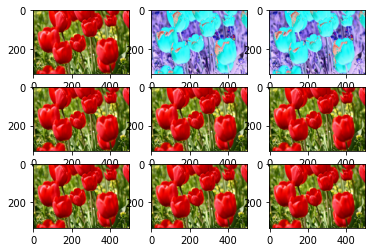

In [14]:
for i in range(9):
    data_augment=data_inventing(image)
    plt.subplot(3,3,i+1)
    plt.imshow(data_augment[0].numpy().astype('uint8'))

In [15]:
def random_invert_img1(x, p=0.6):
    if  tf.random.normal([]) > p:
        x = (255-x)
    else:
        x
    return x
def data_inventation(factor=0.4):
    return layers.Lambda(lambda x: random_invert_img1(x, factor))

In [16]:
data_invent=data_inventation(factor=.3)

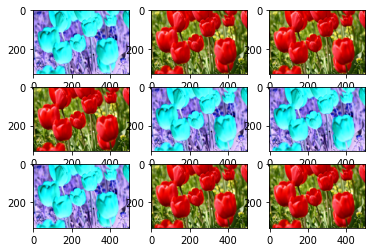

In [17]:
for i in range(9):
    data_augment=data_invent(image)
    plt.subplot(3,3,i+1)
    plt.imshow(data_augment[0].numpy().astype('uint8'))

In [18]:
def random_invert_img1(x, p=0.6):
    if  tf.random.normal([]) > p:
        x = (255-x)
    else:
        x
    return x
def data_inventation(x,factor=0.4):
    return layers.Lambda(lambda x: random_invert_img1(x, factor))

In [19]:
data_invent=data_inventation(image,factor=0.7)

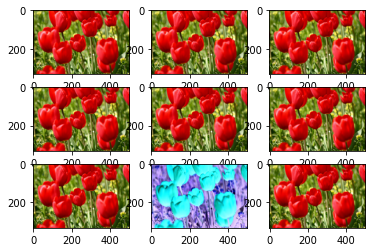

In [20]:
for i in range(9):
    data_augment=data_invent(image)
    plt.subplot(3,3,i+1)
    plt.imshow(data_augment[0].numpy().astype('uint8'))

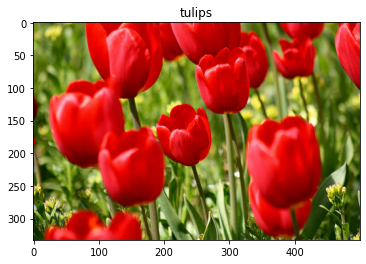

In [21]:
get_label_name=metadata.features['label'].int2str
for image,label in train_ds:
    plt.imshow(image)
    plt.title(get_label_name(label))
    break

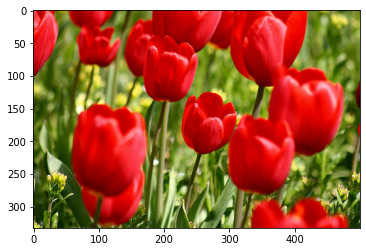

In [22]:
plt.imshow(tf.image.flip_left_right(image))

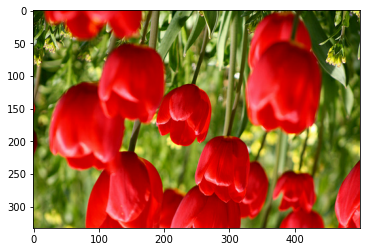

In [23]:
plt.imshow(tf.image.flip_up_down(image))

# Grayscale the image

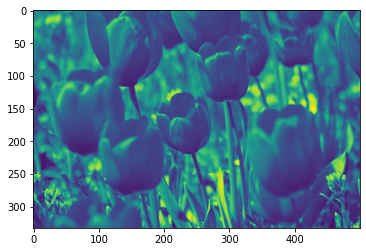

In [24]:
plt.imshow(tf.image.rgb_to_grayscale(image))

## Saturate the image
Saturate an image by providing a saturation factor.

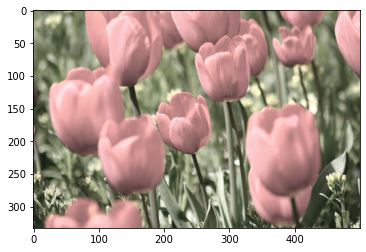

In [25]:
plt.imshow(tf.image.adjust_saturation(image,0.3))

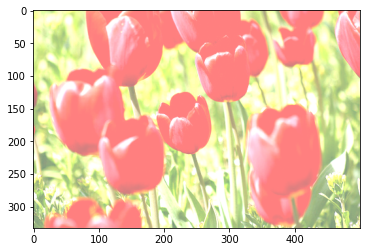

In [26]:
plt.imshow(tf.image.adjust_brightness(image,0.5))

# model

In [27]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower_photos', 
                                   untar=True)
data_dir = pathlib.Path(data_dir)

In [28]:
datagen=ImageDataGenerator(rotation_range=40, 
                                  width_shift_range=0.2,
                                  height_shift_range=0.4,
                                 rescale=1.0/250,
                                  shear_range=0.2,
                                  zoom_range=0.1,
                                 horizontal_flip=True,
                          )

In [29]:
datagenerator=datagen.flow_from_directory(data_dir,target_size=(250,250),batch_size=32)

Found 3670 images belonging to 5 classes.


In [30]:
for x,y in datagenerator:
    print(x.shape)
    print(y.shape)
    break

(32, 250, 250, 3)
(32, 5)


In [31]:
model = keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(250, 250, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 59, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 128)       1

In [ ]:
model.fit(datagenerator,steps_per_epoch=100,epochs=10)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 100 steps
Epoch 1/10
100/100 [==============================] - ETA: 15:03 - loss: 1.6089 - acc: 0.18 - ETA: 11:34 - loss: 1.7375 - acc: 0.15 - ETA: 10:24 - loss: 1.7276 - acc: 0.14 - ETA: 9:48 - loss: 1.7003 - acc: 0.1484 - ETA: 9:26 - loss: 1.6885 - acc: 0.150 - ETA: 8:57 - loss: 1.6650 - acc: 0.187 - ETA: 8:38 - loss: 1.6517 - acc: 0.196 - ETA: 8:30 - loss: 1.6322 - acc: 0.218 - ETA: 8:23 - loss: 1.6337 - acc: 0.211 - ETA: 8:15 - loss: 1.6267 - acc: 0.215 - ETA: 8:10 - loss: 1.6286 - acc: 0.204 - ETA: 8:00 - loss: 1.6244 - acc: 0.208 - ETA: 7:50 - loss: 1.6231 - acc: 0.204 - ETA: 7:40 - loss: 1.6209 - acc: 0.209 - ETA: 7:33 - loss: 1.6172 - acc: 0.208 - ETA: 7:24 - loss: 1.6175 - acc: 0.205 - ETA: 7:17 - loss: 1.6150 - acc: 0.207 - ETA: 7:09 - loss: 1.6101 - acc: 0.218 - ETA: 7:02 - loss: 1.6071 - acc: 0.217 - ETA: 6:54 - loss: 1.6045 - acc: 0.218 - ETA: 6:49 - loss: 1.6026 - acc: 0.217 - ETA: 6:44 - loss: 1.5993 - acc: 0.218 - ETA: 6:37 - loss: 1.5960 - acc: 0.224 - ETA: 

100/100 [==============================] - ETA: 13:40 - loss: 1.0982 - acc: 0.68 - ETA: 11:23 - loss: 0.9395 - acc: 0.71 - ETA: 10:20 - loss: 0.9854 - acc: 0.66 - ETA: 9:43 - loss: 1.0083 - acc: 0.6406 - ETA: 9:10 - loss: 1.0316 - acc: 0.612 - ETA: 8:42 - loss: 1.0614 - acc: 0.599 - ETA: 8:20 - loss: 1.0582 - acc: 0.584 - ETA: 8:03 - loss: 1.0461 - acc: 0.601 - ETA: 7:51 - loss: 1.0365 - acc: 0.607 - ETA: 7:35 - loss: 1.0303 - acc: 0.603 - ETA: 7:23 - loss: 1.0503 - acc: 0.582 - ETA: 7:11 - loss: 1.0681 - acc: 0.567 - ETA: 7:00 - loss: 1.0524 - acc: 0.581 - ETA: 6:53 - loss: 1.0479 - acc: 0.582 - ETA: 6:47 - loss: 1.0409 - acc: 0.591 - ETA: 6:40 - loss: 1.0463 - acc: 0.589 - ETA: 6:38 - loss: 1.0571 - acc: 0.593 - ETA: 6:31 - loss: 1.0558 - acc: 0.590 - ETA: 6:28 - loss: 1.0466 - acc: 0.590 - ETA: 6:24 - loss: 1.0394 - acc: 0.592 - ETA: 6:18 - loss: 1.0436 - acc: 0.586 - ETA: 6:11 - loss: 1.0452 - acc: 0.586 - ETA: 6:09 - loss: 1.0459 - acc: 0.591 - ETA: 6:03 - loss: 1.0408 - acc: 0.59

 65/100 [==================>...........] - ETA: 10:03 - loss: 0.9487 - acc: 0.59 - ETA: 8:28 - loss: 0.8583 - acc: 0.5781 - ETA: 7:49 - loss: 0.9270 - acc: 0.572 - ETA: 7:49 - loss: 0.9918 - acc: 0.531 - ETA: 7:31 - loss: 0.9772 - acc: 0.543 - ETA: 7:15 - loss: 0.9530 - acc: 0.557 - ETA: 7:01 - loss: 0.9676 - acc: 0.571 - ETA: 6:54 - loss: 0.9991 - acc: 0.578 - ETA: 6:54 - loss: 0.9987 - acc: 0.576 - ETA: 6:50 - loss: 0.9996 - acc: 0.578 - ETA: 6:43 - loss: 0.9750 - acc: 0.588 - ETA: 6:39 - loss: 0.9663 - acc: 0.596 - ETA: 6:37 - loss: 0.9463 - acc: 0.608 - ETA: 6:42 - loss: 0.9518 - acc: 0.604 - ETA: 6:47 - loss: 0.9477 - acc: 0.606 - ETA: 6:45 - loss: 0.9528 - acc: 0.603 - ETA: 6:48 - loss: 0.9522 - acc: 0.608 - ETA: 6:44 - loss: 0.9618 - acc: 0.604 - ETA: 6:42 - loss: 0.9730 - acc: 0.602 - ETA: 6:42 - loss: 0.9616 - acc: 0.606 - ETA: 6:36 - loss: 0.9585 - acc: 0.611 - ETA: 6:34 - loss: 0.9448 - acc: 0.620 - ETA: 6:30 - loss: 0.9280 - acc: 0.629 - ETA: 6:26 - loss: 0.9220 - acc: 0.63